<a href="https://colab.research.google.com/github/hanseul1215/ESAA_study/blob/master/0530_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스

##01 딥러닝 준비
- 케라스는 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것임
- 텐서플로만 지원  

**하이퍼파라미터**  
사용자가 직접 설정해야하는 값  
**과소, 과대 적합**  
모델이 충분히 학습되지 않은 경우(과소), 학습 데이터에 과하게 적합된 경우(과대)  
**에포크**  
딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프  
**손실함수**  
예측값과 정답 값의 차이 또는 오차(딥러닝 모델의 출력 값과 실제값의 차이)  
ex) 이진분류의 문제 -> 'binary_crossentropy', 'sigmoid'  
    다중분류의 문제 -> 'categorical_crossentropy', 'softmax'  
    정답 클래스가 레이블 값일때 -> 'sparse_categorial_crossentropy'  

**경사하강법**  
모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법  
>1 가설함수, 손실함수 정의  
>2 w, b 구하기  
>3 학습률을 곱하여 w, b 업데이트

**딥러닝 프로세스**
> 1 데이터 전처리(배열의 차원을 변경하거나 스케일을 조정)  
> 2 모델 생성(순차적 구조 -> Sequential API,   
              복잡한 구조 -> Functional API 구현)  
> 3 모델 컴파일(손실합수, 옵티마이저, 평가지표 등을 정의)  
> 4 모델 훈련  
> 5 모델 검증  
> 6 모델 예측
            

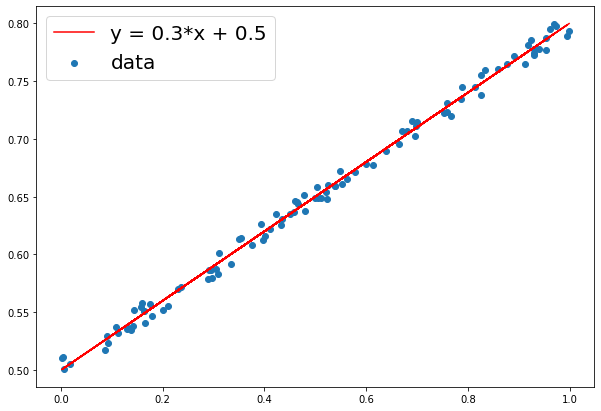

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [2]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.75192, b = 0.26713 error = 0.95333
 5 w = 0.67851, b = 0.29599 error = 0.65203
10 w = 0.62015, b = 0.32734 error = 0.46700
15 w = 0.57081, b = 0.35391 error = 0.33462
20 w = 0.52908, b = 0.37638 error = 0.23991
25 w = 0.49378, b = 0.39538 error = 0.17215
30 w = 0.46392, b = 0.41146 error = 0.12367
35 w = 0.43867, b = 0.42505 error = 0.08899
40 w = 0.41731, b = 0.43656 error = 0.06417
45 w = 0.39924, b = 0.44628 error = 0.04642
50 w = 0.38396, b = 0.45451 error = 0.03372
55 w = 0.37103, b = 0.46147 error = 0.02463
60 w = 0.36010, b = 0.46736 error = 0.01813
65 w = 0.35085, b = 0.47234 error = 0.01347
70 w = 0.34302, b = 0.47655 error = 0.01015
75 w = 0.33641, b = 0.48011 error = 0.00776
80 w = 0.33081, b = 0.48313 error = 0.00606
------------------------------------------------------------
85 w = 0.3, b = 0.5 error = 0.00484


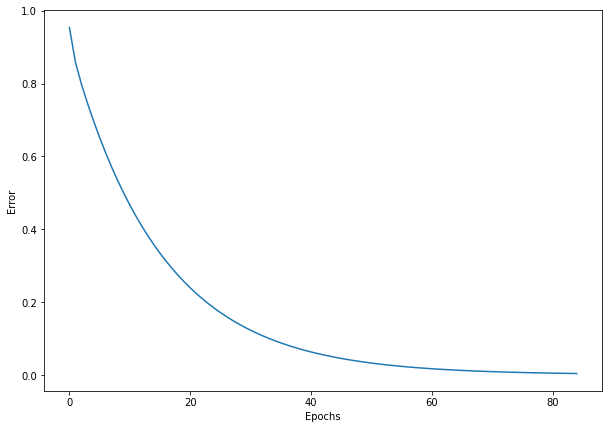

In [3]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

##02 단순 신경망 훈련

**단순선형회귀**  
하나의 X가 Y에 미치는 영향을 추정하여 1차 함수 관계로 나타냄  
**뉴런**  
인공 신경망 모델을 구성하는 하나의 신경  
**Dense 레이어**  
심층 신경망 모델을 구성하는 가장 기본 레이어, Fully Connected Layer
**Sequential API**  
2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음  

In [4]:
# 데이터셋 만들기
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


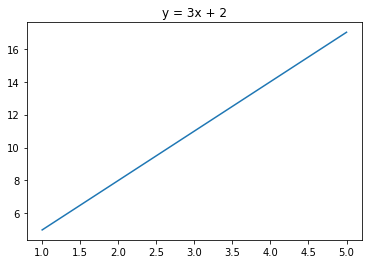

In [5]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

In [6]:
import tensorflow as tf
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [7]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [8]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [9]:
# 단순선형회귀 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])     
])

In [10]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 긴문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [12]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [13]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 766ms/step - loss: 9.2064 - mean_absolute_error: 9.2064 - mean_squared_error: 96.2983
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 9.1564 - mean_absolute_error: 9.1564 - mean_squared_error: 95.2365
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 9.1064 - mean_absolute_error: 9.1064 - mean_squared_error: 94.1806
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 9.0564 - mean_absolute_error: 9.0564 - mean_squared_error: 93.1306
Epoch 5/5
1/1 [==============================] - 0s 27ms/step - loss: 9.0064 - mean_absolute_error: 9.0064 - mean_squared_error: 92.0864


In [15]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 542ms/step - loss: 228.9948 - mae: 14.0298
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 133.4978 - mae: 10.7427
Epoch 3/1200
1/1 [==============================] - 0s 7ms/step - loss: 77.8466 - mae: 8.2332
Epoch 4/1200
1/1 [==============================] - 0s 7ms/step - loss: 45.4154 - mae: 6.3174
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 26.5158 - mae: 4.8548
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 15.5017 - mae: 3.7382
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 9.0829 - mae: 2.8857
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 5.3420 - mae: 2.2348
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.1617 - mae: 1.7378
Epoch 10/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.8907 - mae: 1.3583
Epoch 11/1200
1/1 [==============================] -

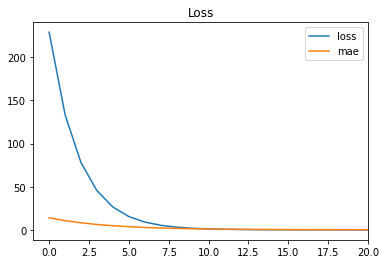

In [16]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [17]:
#검증
model.evaluate(x,y)

1/1 [==============================] - 0s 303ms/step - loss: 3.6648e-05 - mae: 0.0052


[3.664824544102885e-05, 0.005195999052375555]

In [18]:
#예측
model.predict([10])

array([[32.025112]], dtype=float32)

##03 심층 신경망으로 이미지 분류

In [19]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [21]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


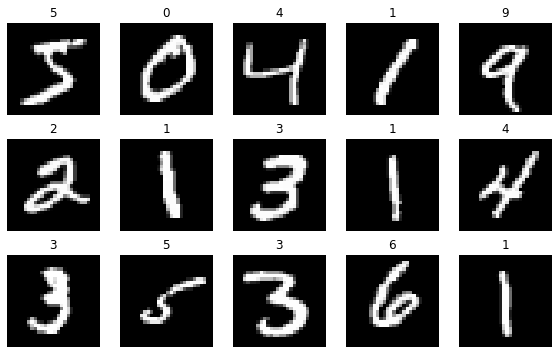

In [22]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [23]:
# 데이터 전처리
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [24]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [25]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [26]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

**flatten 레이어**  
Dense 레이어에 입력값으로 1차원의 배열을 넣기 위해 데이터를 1차원으로 전처리하는층

In [27]:
# flatten 레이어
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [28]:
print(f'변경전 shape: {x_train.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


**활성화 함수**  
입력을 비선형 출력으로 변환해주는 함수
- Sigmoid
- tanh
- ReLU
- Leaky ReLU


In [29]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [30]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

In [31]:
#입력과 출력
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [32]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

In [33]:
# 손실함수
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [34]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

**옵티마이저**  
- SGD
- Adam
- Adagrad
- Nadam
- RMSprop
- Adadelta
- Adamax
- Ftrl

In [35]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
# 평가지표
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [37]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [38]:
# 훈련
model.fit(x_train, y_train, 
          # 검증셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2237 - accuracy: 0.9320 - val_loss: 0.1215 - val_accuracy: 0.9629
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0918 - accuracy: 0.9722 - val_loss: 0.0961 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0853 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0764 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.1052 - val_accurac

In [39]:
# 평가
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9777
검증셋 정확도: 0.9776999950408936


In [40]:
# 예측
predictions = model.predict(x_test)

In [41]:
# 예측 결과 출력
predictions[0]

array([4.0619447e-10, 3.9529328e-07, 4.8462677e-08, 2.8633972e-06,
       6.0738242e-10, 1.3737116e-08, 1.1388380e-12, 9.9999642e-01,
       6.5686045e-08, 3.0198149e-07], dtype=float32)

In [42]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


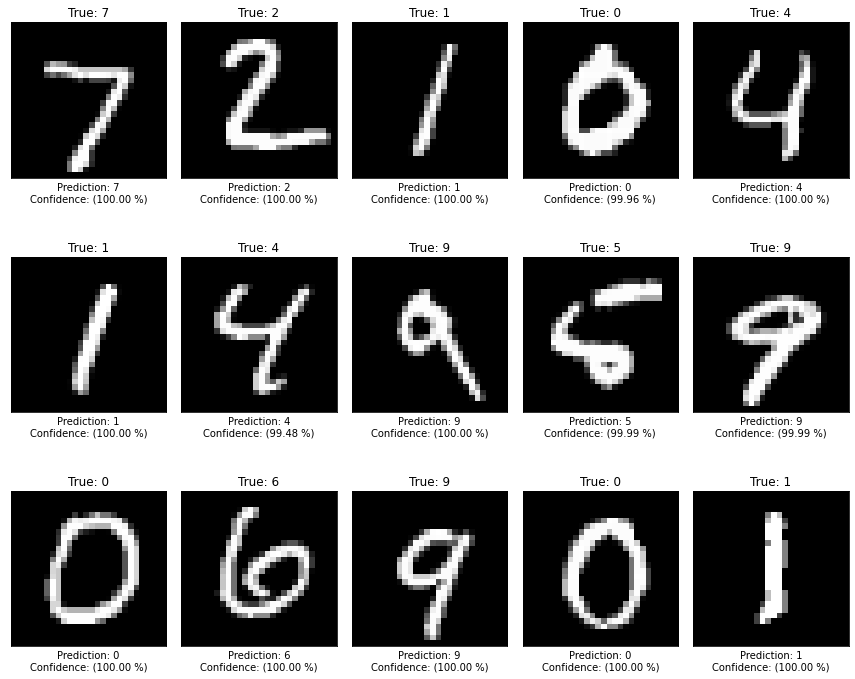

In [43]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

## 04 모델 세부 설정

In [44]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


In [45]:
# 초기값 설정
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [46]:
#문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

**규제**  
모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용

In [47]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_22',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [48]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


**드롭아웃**  
과대적합을 해결하기 위해 노드의 일부 신호를 임의로 삭제하여 모델이 학습하는 가중치 파라미터의 개수를 줄이는 방법 

In [49]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

**배치 정규화**  
각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함

In [50]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

In [52]:
# 활성화 함수
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [53]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [54]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.9165 - val_loss: 0.1585 - val_accuracy: 0.9541
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1313 - accuracy: 0.9606 - val_loss: 0.1476 - val_accuracy: 0.9558
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0981 - accuracy: 0.9704 - val_loss: 0.1015 - val_accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9754 - val_loss: 0.1012 - val_accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0951 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0454 - accuracy: 0.9851 - val_loss: 0.0926 - val_accuracy:

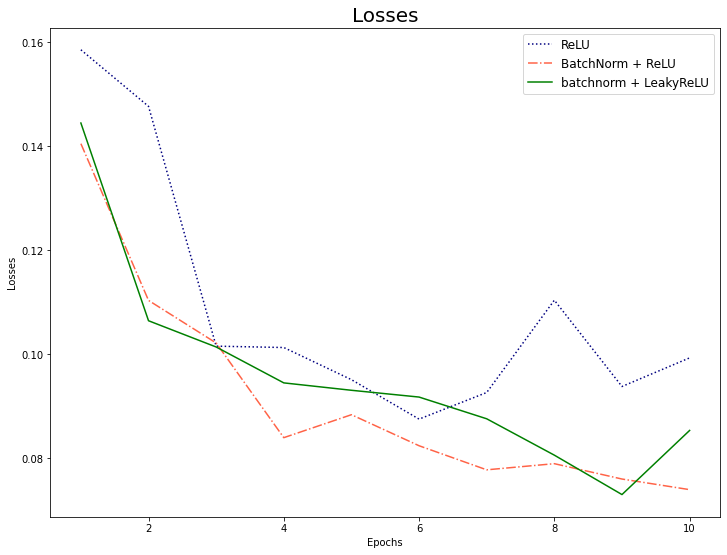

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()